In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn .preprocessing import StandardScaler, scale 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [35]:
glass_2 = glass.copy()

In [36]:
X= glass_2.drop(['Type'],axis=1)

In [37]:
Y = glass['Type']

In [38]:
glass_norm = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns, index=X.index)

In [18]:
# checking the value for k

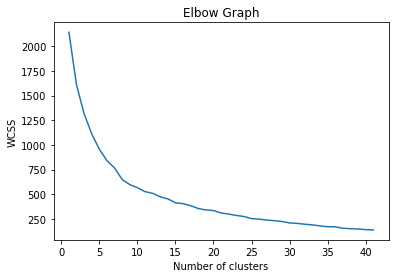

In [19]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,42):
    kmeans=KMeans(n_clusters=i,random_state=24)
    kmeans.fit(glass_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,42),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# it seems like 15 or 16 could be optimum value for k

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20)

## KNN Model

In [40]:
num_folds = 10
kfold = KFold(n_splits =10)

In [41]:
# When k=15
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [43]:
results = cross_val_score(model,x_train,y_train,cv=kfold)
print(results.mean())

0.6313725490196079


In [42]:
y_train_pred = model.predict(x_train)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       0.57      0.87      0.69        53
           2       0.75      0.72      0.73        61
           3       0.50      0.13      0.21        15
           5       0.70      0.64      0.67        11
           6       0.00      0.00      0.00         7
           7       0.94      0.71      0.81        24

    accuracy                           0.68       171
   macro avg       0.58      0.51      0.52       171
weighted avg       0.67      0.68      0.65       171



In [58]:
# K= 16
model_2 = KNeighborsClassifier(n_neighbors = 16)
model_2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [59]:
results = cross_val_score(model_2,x_train,y_train,cv=kfold)
print(results.mean())

0.6313725490196079


In [60]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

2    17
1    17
7     7
6     1
5     1
dtype: int64

In [61]:
pd.crosstab(y_test,preds)

col_0,1,2,5,6,7
Type,,,,,
1,13,4,0,0,0
2,3,11,0,1,0
3,1,1,0,0,0
5,0,0,1,0,1
6,0,1,0,0,1
7,0,0,0,0,5


In [62]:
# Accuracy
np.mean(preds==y_test)

0.6976744186046512